In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Petal mahkota
# Sepal kelopak

In [3]:
iris = pd.read_csv('iris_seleksi.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(155, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  153 non-null    float64
 1   sepal_width   154 non-null    float64
 2   petal_length  155 non-null    object 
 3   petal_width   155 non-null    float64
 4   species       155 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.2+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_width
count,153.000000,154.000000,155.000000
mean,18.793464,3.070779,1.168387
std,113.293579,0.457176,0.769277
min,-1.000000,2.000000,0.100000
25%,5.100000,2.800000,0.300000
50%,5.800000,3.000000,1.300000
75%,6.400000,3.300000,1.800000
max,1000.000000,5.000000,2.500000


In [7]:
display(iris.duplicated().sum())

3

In [8]:
iris.isna().sum().sum()/len(iris)

0.01935483870967742

In [9]:
iris['petal_length'].unique()

array(['1.4', '1.3', '1.5', '1.7', '1.6', '1.1', '1.2', '1.0', '1.9',
       '4.7', '4.5', '4.9', '4.0', '4.6', '3.3', '3.9', '3.5', '4.2',
       '3.6', '4.4', '4.1', '4.8', '4.3', '5.0', '3.8', '3.7', '5.1',
       '3.0', '6.0', '5.9', '5.6', '5.8', '6.6', '6.3', '6.1', '5.3',
       '5.5', '6.7', '6.9', '5.7', '6.4', '5.4', '5.2', '2.0', 'invalid'],
      dtype=object)

In [10]:
iris.loc[iris.petal_length == 'invalid']

,sepal_length,sepal_width,petal_length,petal_width,species
154,999.9,3.1,invalid,0.2,Unknown-species


In [11]:
feature_col = iris.drop('species', axis=1).columns
target_col = 'species'

# Copy data

In [12]:
copied = iris.copy()
copied.drop(154, inplace=True)
copied.drop_duplicates(inplace=True)
copied.dropna(inplace=True)
copied.reset_index(inplace=True, drop=True)
copied.petal_length = copied.petal_length.astype('Float32')
display(copied.head(), copied.shape, copied.isna().sum().sum(), copied.duplicated().sum().sum())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(149, 5)

0

0

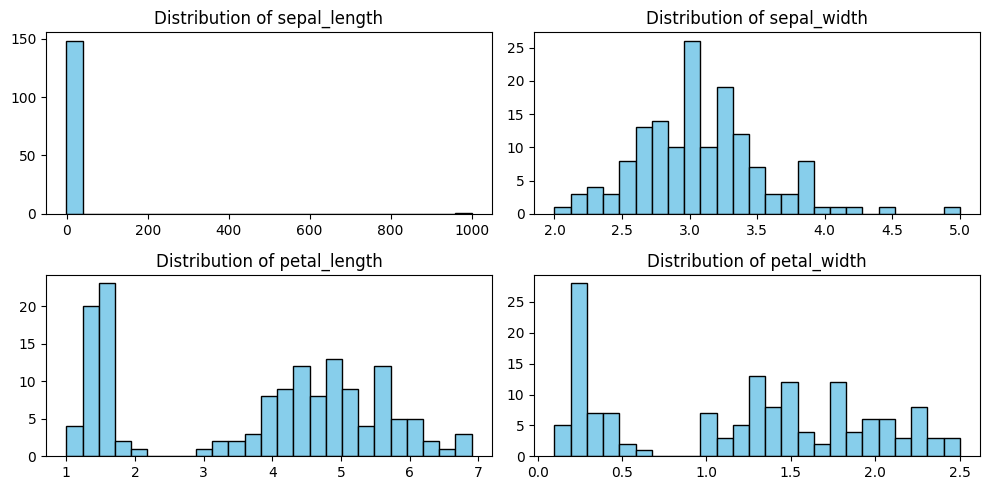

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

for ax, col in zip(axes.ravel(), feature_col):
    ax.hist(copied[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout()

In [14]:
def find_outlier(df):
    outlier_value = []
    for i in df:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)
        for idx, j in enumerate(df[i]):
            if (j<lower or j>upper):
                outlier_value.append((idx, j, i))
    return outlier_value

In [15]:
find_outlier(copied[feature_col])

[(147, -1.0, 'sepal_length'),
 (148, 1000.0, 'sepal_length'),
 (15, 4.4, 'sepal_width'),
 (148, 5.0, 'sepal_width')]

Outlier cuman ada di sepal

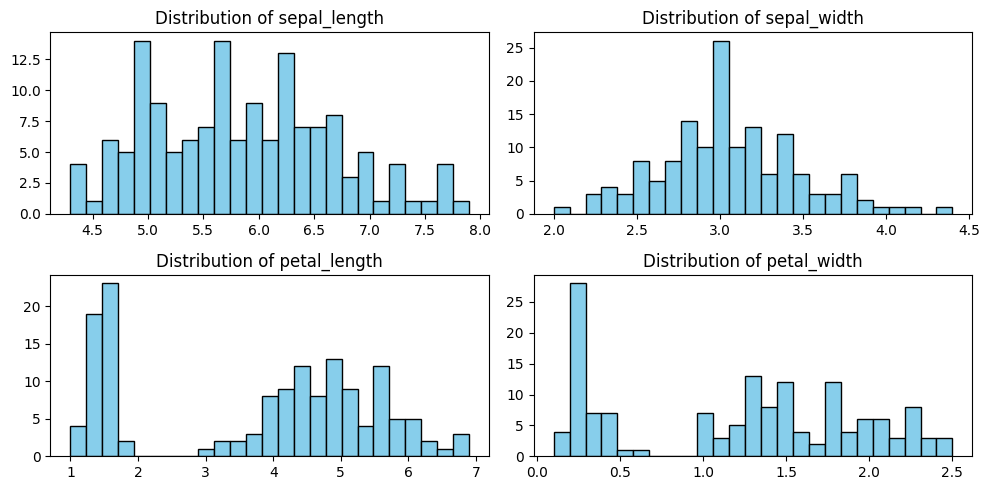

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

for ax, col in zip(axes.ravel(), feature_col):
    ax.hist(copied.drop([147, 148])[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout()

Sepal memiliki distribusi paling mendekati Gaussian Bell Curve jika outlier dihapus

Petal memiliki distribusi bimodal baik jika outlier dihapus maupun tidak dihapus

??Gimana kalo petal_length >2 dengan <2 dan petal_width >0.6 dan <0.6 disendirikan

In [17]:
display(copied.iloc[148], copied.iloc[147]) #Consider dihapus

sepal_length         1000.0
sepal_width             5.0
petal_length            2.0
petal_width             0.5
species         Iris-setosa
Name: 148, dtype: object

sepal_length           -1.0
sepal_width             3.5
petal_length            1.4
petal_width             0.1
species         Iris-setosa
Name: 147, dtype: object

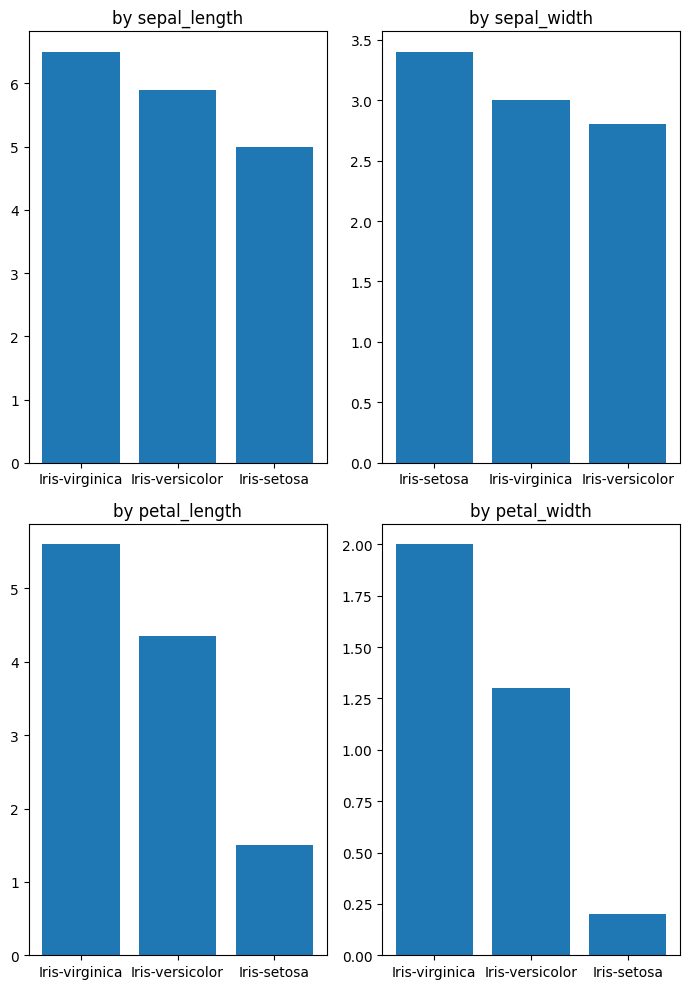

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (7,10))

for ax, col in zip(axes.ravel(), feature_col):
    data = copied.groupby('species')[col].median().sort_values(ascending=False)
    ax.bar(data.index, data.values)
    ax.set_title(f'by {col}')
    plt.tight_layout()


Setosa memiliki petal terkecil (njomplang) diantara yang lain

Tips: Jika ada bunga yang petalnya paling kecil dari yang lain, besar kemungkinannya itu adalah Setosa

Berdasarkan chart ini, juga terlihat bahwa feature petal memiliki signifikansi terbesar dibandingkan sepal

In [19]:
copied.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


# Rasio ukuran bunga

In [20]:
ratio_value = []
sum_value = []
for idx in range(len(copied)):
    sum_value.append(np.sum(copied[feature_col].values[idx]))

for i in sum_value:
    ratio_value.append(i/np.mean(sum_value))

display(ratio_value[:5])
copied['size_ratio'] = ratio_value
copied.head()


[0.49747954083992163,
 0.4633387879573801,
 0.4584615363827613,
 0.4584615387084155,
 0.49747954083992163]

,sepal_length,sepal_width,petal_length,petal_width,species,size_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.497480
1,4.9,3.0,1.4,0.2,Iris-setosa,0.463339
2,4.7,3.2,1.3,0.2,Iris-setosa,0.458462
3,4.6,3.1,1.5,0.2,Iris-setosa,0.458462
4,5.0,3.6,1.4,0.2,Iris-setosa,0.497480


<Axes: >

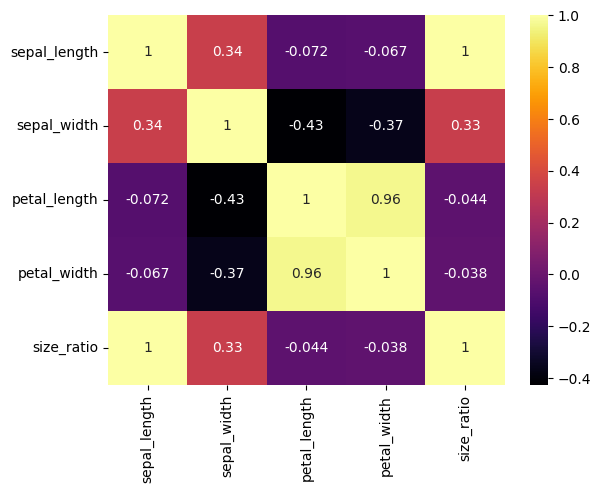

In [21]:
sns.heatmap(copied.corr(numeric_only=True), cmap='inferno', annot=True)

<Axes: >

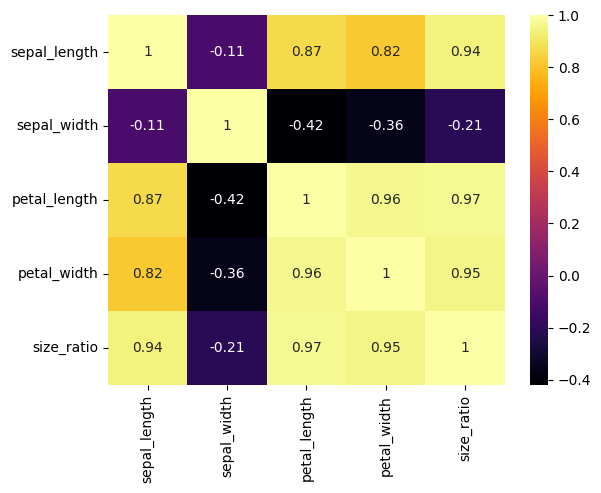

In [22]:
sns.heatmap(copied.drop([148, 147]).corr(numeric_only=True), cmap='inferno', annot=True)

1. sepal_length tinggi korelasinya dengan size_ratio karena bias di outlier
2. Ukuran petal saling berkorelasi, yang gede di petal_length juga gede di petal_width
3. Sepal dan petal ternyata berkorelasi negatif, makanya di barplot tadi setose kecil di petal, relatif besar di sepal
4. Satu-satunya yang ngasilin hubungan negatif (Jika drop outlier) adalah sepal_width, dan sepal width adalah variable dimana setosa unggul


<BarContainer object of 3 artists>

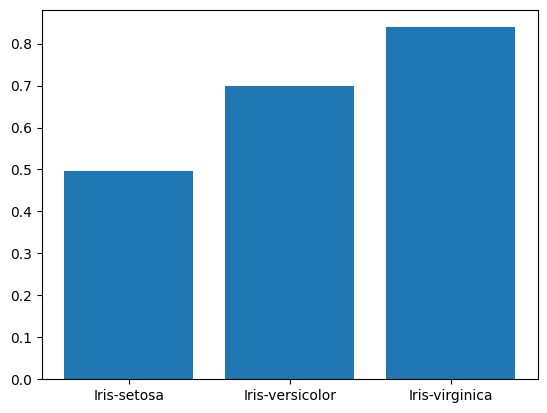

In [23]:
group_ratio = copied.groupby('species')['size_ratio'].median()
plt.bar(group_ratio.index, group_ratio.values)

Overall, bar chart diatas adalah ranking ukuran secara keseluruhan

**Hipotesa:** sepal_width yang besar, cenderung menghasilkan bunga yang kecil

In [24]:
petal_besar = copied.loc[copied.petal_length>2].loc[copied.petal_width>0.6]
petal_kecil = copied.loc[copied.petal_length<2].loc[copied.petal_width<0.6]
display(petal_kecil.head(), petal_besar.head())

,sepal_length,sepal_width,petal_length,petal_width,species,size_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.497480
1,4.9,3.0,1.4,0.2,Iris-setosa,0.463339
2,4.7,3.2,1.3,0.2,Iris-setosa,0.458462
3,4.6,3.1,1.5,0.2,Iris-setosa,0.458462
4,5.0,3.6,1.4,0.2,Iris-setosa,0.497480


,sepal_length,sepal_width,petal_length,petal_width,species,size_ratio
48,7.0,3.2,4.7,1.4,Iris-versicolor,0.794992
49,6.4,3.2,4.5,1.5,Iris-versicolor,0.760851
50,6.9,3.1,4.9,1.5,Iris-versicolor,0.799869
51,5.5,2.3,4.0,1.3,Iris-versicolor,0.638920
52,6.5,2.8,4.6,1.5,Iris-versicolor,0.751097


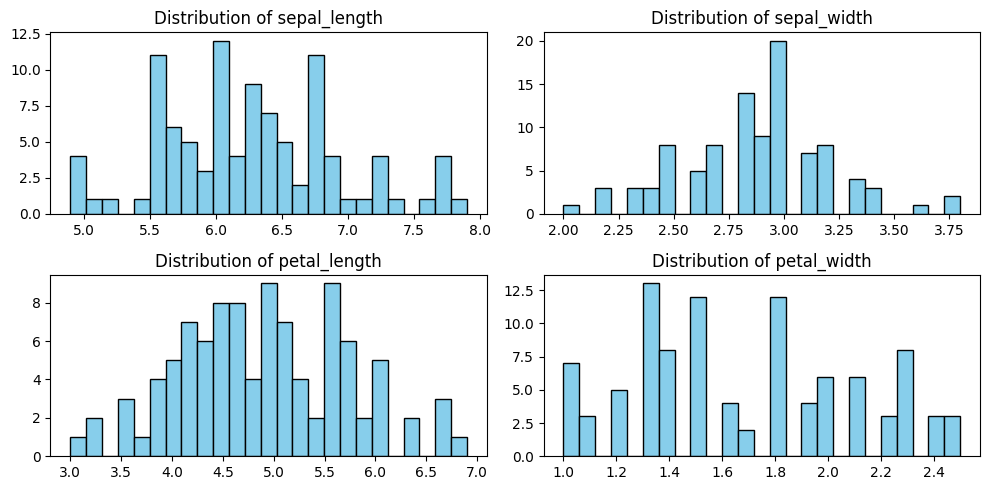

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

for ax, col in zip(axes.ravel(), feature_col):
    ax.hist(petal_besar[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout()

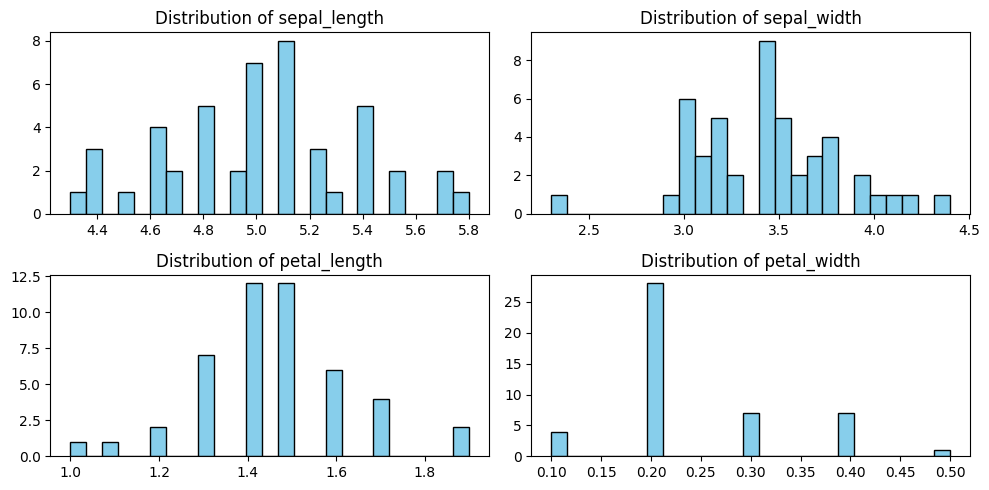

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

for ax, col in zip(axes.ravel(), feature_col):
    ax.hist(petal_kecil.drop(147)[col], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    plt.tight_layout()

In [27]:
display(petal_besar.species.unique(), petal_kecil.species.unique())

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

array(['Iris-setosa'], dtype=object)

bimodal bagian kiri wilayahnya setosa

In [28]:
copied.loc[copied.size_ratio > 1]

,sepal_length,sepal_width,petal_length,petal_width,species,size_ratio
148,1000.0,5.0,2.0,0.5,Iris-setosa,49.138298


# Data Preprocessing

In [29]:
iris_cleaned = iris.copy()
iris_cleaned.drop(154, inplace=True)
iris_cleaned.drop_duplicates(inplace=True)
iris_cleaned.dropna(inplace=True)
iris_cleaned.reset_index(inplace=True, drop=True)
iris_cleaned.petal_length = iris_cleaned.petal_length.astype(float)
display(iris_cleaned.head(), iris_cleaned.shape, iris_cleaned.isna().sum().sum(), iris_cleaned.duplicated().sum().sum())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


(149, 5)

0

0

In [30]:
find_outlier(iris_cleaned.select_dtypes(include=np.number))

[(147, -1.0, 'sepal_length'),
 (148, 1000.0, 'sepal_length'),
 (15, 4.4, 'sepal_width'),
 (148, 5.0, 'sepal_width')]

In [31]:
iris_cleaned.drop([147, 148], inplace=True)

In [32]:
find_outlier(iris_cleaned.select_dtypes(include=np.number))

[(15, 4.4, 'sepal_width'),
 (32, 4.1, 'sepal_width'),
 (33, 4.2, 'sepal_width'),
 (58, 2.0, 'sepal_width')]

In [33]:
iris_cleaned.to_csv('cleaned.csv')

# Train test split 

In [34]:
def train_test_split(df, feature, target, test_ratio):
    df = df.sample(frac=1)
    
    test = df.iloc[:int(test_ratio*len(df))]
    train = df.iloc[int(test_ratio*len(df)):]
    
    X_train, y_train = train[feature], train[target]
    X_test, y_test = test[feature], test[target]

    return X_train, X_test, y_train, y_test

In [35]:
def stratified_split(df, feature, target, test_ratio):
    indices = []
    for (c1,c2,c3) in zip(*[np.where(df[target] == c)[0] for c in np.unique(df[target])]):
        indices.append((c1,c2,c3))
    
    conc_indices = np.concatenate(indices)
    
    testing_indices = conc_indices[:int(len(df)*test_ratio)]
    training_indices = conc_indices[int(len(df)*test_ratio):]

    X_train, y_train  = df[feature].iloc[training_indices], df[target].iloc[training_indices]
    X_test, y_test = df[feature].iloc[testing_indices], df[target].iloc[testing_indices]
    
    return X_train, X_test, y_train, y_test

In [36]:
X_train, X_test, y_train, y_test = stratified_split(iris_cleaned, feature_col, target_col, 0.3)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(iris_cleaned, feature_col, target_col, 0.3)
X_train

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
10,5.4,3.7,1.5,0.2
27,5.2,3.5,1.5,0.2
121,6.3,2.7,4.9,1.8
21,5.1,3.7,1.5,0.4
...,...,...,...,...
113,6.4,3.2,5.3,2.3
45,4.6,3.2,1.4,0.2
64,5.6,3.0,4.5,1.5
16,5.4,3.9,1.3,0.4


In [38]:
display(X_train.head(), X_test.head(), y_train.head(), y_test.head())

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
10,5.4,3.7,1.5,0.2
27,5.2,3.5,1.5,0.2
121,6.3,2.7,4.9,1.8
21,5.1,3.7,1.5,0.4


,sepal_length,sepal_width,petal_length,petal_width
130,6.4,2.8,5.6,2.2
119,5.6,2.8,4.9,2.0
145,6.2,3.4,5.4,2.3
17,5.1,3.5,1.4,0.3
100,7.1,3.0,5.9,2.1


6         Iris-setosa
10        Iris-setosa
27        Iris-setosa
121    Iris-virginica
21        Iris-setosa
Name: species, dtype: object

130    Iris-virginica
119    Iris-virginica
145    Iris-virginica
17        Iris-setosa
100    Iris-virginica
Name: species, dtype: object

In [39]:
len(train_test_split(iris_cleaned, feature_col, target_col, 0.3))

4

# Modelling

In [40]:
class KNN:

    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train.values
        self.y_train = y_train.values

    def single_predict(self, single_X_test):
        distances = np.array([np.linalg.norm(single_X_test-x) for x in self.X_train])
        k_nearest = distances.argsort()[:self.k]
        predicted = pd.Series(self.y_train[k_nearest]).mode().values
        return predicted[0]
        
    
    def predict(self, X_test):
        predicted_list = []
        for test in X_test.values:
            predicted_list.append(self.single_predict(test))
        return predicted_list

    def accuracy(self, y_test, y_pred):
        correct = np.sum(y_test == y_pred)
        return correct/len(y_test)

In [41]:
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.accuracy(y_test, y_pred)

1.0

In [42]:
pd.read_csv('cleaned.csv')

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
142,142,6.7,3.0,5.2,2.3,Iris-virginica
143,143,6.3,2.5,5.0,1.9,Iris-virginica
144,144,6.5,3.0,5.2,2.0,Iris-virginica
145,145,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
class Cross_Validation:

    def __init__(self, model, n_folds=5, rand=True, strat=True):
        self.model = model
        self.n_folds = n_folds
        self.rand = rand
        self.strat = strat
    
    def fit(self, df, target_column):
        self.X = df.drop(target_column, axis=1)
        self.y = df[target_column]

        indices = [range(len(df))]
        class_indices = [np.where(self.y == c)[0] for c in np.unique(self.y)]

        if self.rand:
            if self.strat:
                class_indices = [np.random.permutation(cat) for cat in class_indices]
                stratified = []

                for (c1, c2, c3) in zip(*class_indices):
                    stratified.append((c1,c2,c3))

                folds = np.array_split(stratified, self.n_folds)
        
                folds_conc = [np.concatenate(arr) for arr in folds]
        
                self.folds = folds_conc
            
            indices = np.random.permutation(indices[0])
            self.folds = np.array_split(indices, self.n_folds)

        self.folds = np.array_split(indices[0], self.n_folds)
        return self.folds

    def run_cv(self):
        
        accuracy = []

        for idx in range(len(self.folds)):
            testing_indices = self.folds[idx]
            training_indices = np.concatenate([self.folds[x] for x in range(len(self.folds)) if x != idx])
        
            X_train, X_test, y_train, y_test = self.X.iloc[training_indices], self.X.iloc[testing_indices], self.y.iloc[training_indices], self.y.iloc[testing_indices]

            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy.append(knn.accuracy(y_test, y_pred))

        return np.mean(accuracy)

In [44]:
cv = Cross_Validation(knn, strat=False, rand=False)
cv.fit(iris_cleaned, 'species')
cv.run_cv()

0.9103448275862067

In [45]:
acc = []
for k in range(1, 21):
    knn = KNN(k=k)
    cv.fit(iris_cleaned, 'species')
    acc.append((cv.run_cv(), k))

sorted(acc)

[(0.8691954022988506, 17),
 (0.8691954022988506, 18),
 (0.8691954022988506, 20),
 (0.8829885057471264, 16),
 (0.8829885057471264, 19),
 (0.8965517241379312, 2),
 (0.8967816091954022, 12),
 (0.9034482758620689, 3),
 (0.9034482758620689, 4),
 (0.9034482758620689, 6),
 (0.9036781609195401, 11),
 (0.9036781609195401, 14),
 (0.9036781609195401, 15),
 (0.9103448275862067, 5),
 (0.9103448275862067, 7),
 (0.9103448275862067, 8),
 (0.9103448275862067, 10),
 (0.9105747126436782, 13),
 (0.9172413793103449, 9),
 (0.9241379310344827, 1)]

In [46]:
knn = KNN(k=100)
knn.fit(X_train, y_train)
knn.single_predict(np.array([5.0, 3.6, 1.4, 0.2]))

'Iris-setosa'

In [47]:
pd.read_csv('cleaned.csv').drop('Unnamed: 0',  axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
'sepatu'[-1]

'u'

In [52]:
'sepatu'[-2::]

'tu'

In [66]:
def isSubsequence(s: str, t: str) -> bool:

    s_idx = t_idx = 0

    while s_idx < len(s) and t_idx < len(t):
        if s[s_idx] == t[t_idx]:
            s_idx += 1
        t_idx += 1

    return s_idx == len(s)



        

In [69]:
isSubsequence("abc", "ahdgdc")

False

In [65]:
b in a

False

In [114]:
def maxProfit( prices: list[int]) -> int:
    buy = prices[0]
    profit = 0

    for i in range(1, len(prices)):
        if prices[i] < buy:
            buy = prices[i]
        elif (prices[i]-buy) > profit:
            profit = prices[i] - buy
    
    return profit


In [113]:
maxProfit([7,6,4,3,1])

Buy: 6
Sell: 6
Profit: 0
prices[i] = 6


Buy: 4
Sell: 4
Profit: 0
prices[i] = 4


Buy: 3
Sell: 3
Profit: 0
prices[i] = 3


Buy: 1
Sell: 1
Profit: 0
prices[i] = 1




0

In [ ]:
def longestCommonPrefix(strs: list[str]) -> str:
    

(1, 2, 3, 4, 5)

In [ ]:
["flower","flow","flight"]

In [122]:
"flower".removeprefix("flo")

'wer'

In [123]:
def longestCommonPrefix(strs: list[str]) -> str:
    min_length = float('inf')

    for s in strs:
        if len(s) < min_length:
            min_length = len(s)
    
    i = 0
    while i < min_length:
        for s in strs:
            if s[i] != strs[0][i]:
                return s[:i]
        i += 1
    
    return strs[0][:i]

In [124]:
longestCommonPrefix([""])

''

In [133]:
string = ['Ahsan', 'Ahyan', 'Ahmad', 'b', 'cfg',  'Aha', 'Ah', 'Ahtong', 'AhmadIlhamRamadhani']
sorted(string)

['Ah',
 'Aha',
 'Ahmad',
 'AhmadIlhamRamadhani',
 'Ahsan',
 'Ahtong',
 'Ahyan',
 'b',
 'cfg']

In [ ]:
min()

1

In [ ]:

def twoSum(nums: list[int], target: int) -> list[int]:
    n = len(nums)
    p1 = 0
    p2 = p1+1

    while p1 < len(nums)-1:
        

In [9]:
twoSum([2,7,11,15], 18)

[1, 2]

In [20]:

def removeDuplicates( nums: list[int]) -> int:
    count = 0
    n = 0

    while n < len(nums)-1:
        if nums[n] != nums[n+1]:
            count += 1
        n += 1
    
    return count+1

In [22]:
removeDuplicates([0,0,1,1,1,2,2,3,3,4])

5

In [27]:
class Solution:
    def findClosestNumber(self, nums: list[int]) -> int:
        
        nums.sort()
        closest = nums[0]

        for n in nums:
            if abs(n) < abs(closest) or abs(n) == abs(closest):
                closest = n
        return closest


In [28]:
solution = Solution()
solution.findClosestNumber([2,-1,1])

1

In [39]:
class Solution:
    def mergeAlternately(self, word1: str, word2: str) -> str:
        
        i = 0
        min_length = min(len(word1), len(word2))
        max_length = max(len(word1), len(word2))
        word = ""

        while i < min_length:
            word += word1[i] + word2[i]
            i += 1
        
        if len(word1) < len(word2):
            while i < max_length:
                word += word2[i]
                i += 1

        elif len(word2) < len(word1):
            while i < max_length:
                word += word1[i]
                i += 1
        
        return word

In [40]:
solution = Solution()
solution.mergeAlternately("ab", "pqrs")

'apbqrs'

In [55]:
class Solution:
    def romanToInt(self, s: str) -> int:
        d = {
            'I':1, 'V':5,
            'X':10, 'L':50,
            'C':100, 'D':500,
            'M':1000
        }
        to_number = 0
        i = 0

        while i < len(s)-1:
            if d[s[i]] < d[s[i+1]]:
                print("if", i)
                to_number += d[s[i+1]] - d[s[i]]
                i += 2
            else:
                print("else", i)
                to_number += d[s[i]]
                i += 1
        
        if i < len(s):
            to_number += d[s[i]]
            print("akhir", i)
        
        return to_number

In [58]:
solution = Solution()
solution.romanToInt("MCMXCIV")

else 0
if 1
if 3
if 5


1994

In [64]:
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        
        pt = 0
        ps = 0

        if len(s) != 0: 
            while pt < len(t):
                if s[ps] == t[pt]:
                    pt += 1
                    ps += 1
                else:
                    pt += 1
            
            if ps == len(s):
                return True
        else:
            return True
        
        return False
            

In [65]:
solution = Solution()
solution.isSubsequence('', 'ahbgdc')

True